In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv("train.csv",index_col=0)
df2 = pd.read_csv("test.csv",index_col=0)

In [4]:
df1.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,B,B,B,C,B,B,A,E,C,N,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
2,B,B,A,A,B,D,A,F,A,O,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
3,A,A,A,C,B,D,A,D,A,F,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
4,B,B,A,C,B,D,A,E,C,K,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
6,A,A,A,C,B,D,A,E,A,N,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


In [5]:
df2.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,
0,B,B,B,C,B,B,A,E,E,I,...,0.476739,0.376350,0.337884,0.321832,0.445212,0.290258,0.244476,0.087914,0.301831,0.845702
5,A,B,A,C,B,C,A,E,C,H,...,0.285509,0.860046,0.798712,0.835961,0.391657,0.288276,0.549568,0.905097,0.850684,0.693940
15,B,A,A,A,B,B,A,E,D,K,...,0.697272,0.683600,0.404089,0.879379,0.275549,0.427871,0.491667,0.384315,0.376689,0.508099
16,B,B,A,C,B,D,A,E,A,N,...,0.719306,0.777890,0.730954,0.644315,1.024017,0.391090,0.988340,0.411828,0.393585,0.461372
17,B,B,A,C,B,C,A,E,C,F,...,0.313032,0.431007,0.390992,0.408874,0.447887,0.390253,0.648932,0.385935,0.370401,0.900412


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 1 to 499999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    300000 non-null  object 
 1   cat1    300000 non-null  object 
 2   cat2    300000 non-null  object 
 3   cat3    300000 non-null  object 
 4   cat4    300000 non-null  object 
 5   cat5    300000 non-null  object 
 6   cat6    300000 non-null  object 
 7   cat7    300000 non-null  object 
 8   cat8    300000 non-null  object 
 9   cat9    300000 non-null  object 
 10  cont0   300000 non-null  float64
 11  cont1   300000 non-null  float64
 12  cont2   300000 non-null  float64
 13  cont3   300000 non-null  float64
 14  cont4   300000 non-null  float64
 15  cont5   300000 non-null  float64
 16  cont6   300000 non-null  float64
 17  cont7   300000 non-null  float64
 18  cont8   300000 non-null  float64
 19  cont9   300000 non-null  float64
 20  cont10  300000 non-null  float64
 21  cont11  30

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 499995
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    200000 non-null  object 
 1   cat1    200000 non-null  object 
 2   cat2    200000 non-null  object 
 3   cat3    200000 non-null  object 
 4   cat4    200000 non-null  object 
 5   cat5    200000 non-null  object 
 6   cat6    200000 non-null  object 
 7   cat7    200000 non-null  object 
 8   cat8    200000 non-null  object 
 9   cat9    200000 non-null  object 
 10  cont0   200000 non-null  float64
 11  cont1   200000 non-null  float64
 12  cont2   200000 non-null  float64
 13  cont3   200000 non-null  float64
 14  cont4   200000 non-null  float64
 15  cont5   200000 non-null  float64
 16  cont6   200000 non-null  float64
 17  cont7   200000 non-null  float64
 18  cont8   200000 non-null  float64
 19  cont9   200000 non-null  float64
 20  cont10  200000 non-null  float64
 21  cont11  20

In [8]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
cont0,300000.0,0.527335,0.230599,-0.118039,0.405965,0.497053,0.668060,1.058443
cont1,300000.0,0.460926,0.214003,-0.069309,0.310494,0.427903,0.615113,0.887253
cont2,300000.0,0.490498,0.253346,-0.056104,0.300604,0.502462,0.647512,1.034704
cont3,300000.0,0.496689,0.219199,0.130676,0.329783,0.465026,0.664451,1.039560
cont4,300000.0,0.491654,0.240074,0.255908,0.284188,0.390470,0.696599,1.055424
cont5,300000.0,0.510526,0.228232,0.045915,0.354141,0.488865,0.669625,1.067649
cont6,300000.0,0.467476,0.210331,-0.224689,0.342873,0.429383,0.573383,1.111552
cont7,300000.0,0.537119,0.218140,0.203763,0.355825,0.504661,0.703441,1.032837
cont8,300000.0,0.498456,0.239920,-0.260275,0.332486,0.439151,0.606056,1.040229
cont9,300000.0,0.474872,0.218007,0.117896,0.306874,0.434620,0.614333,0.982922


In [9]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
cont0,200000.0,0.526858,0.230506,-0.117993,0.405787,0.496602,0.666389,1.058434
cont1,200000.0,0.460882,0.213896,-0.069316,0.310536,0.427656,0.615041,0.887253
cont2,200000.0,0.491686,0.252852,-0.056095,0.302189,0.503075,0.648234,1.034687
cont3,200000.0,0.496263,0.219304,0.130655,0.328865,0.464590,0.663401,1.039558
cont4,200000.0,0.492200,0.240251,0.255903,0.284188,0.395080,0.697252,1.055423
cont5,200000.0,0.509944,0.228100,0.045921,0.353682,0.488378,0.668586,1.067641
cont6,200000.0,0.468050,0.210167,-0.224613,0.342813,0.429819,0.573861,1.111540
cont7,200000.0,0.537617,0.218197,0.203763,0.356482,0.505216,0.703289,1.032823
cont8,200000.0,0.497587,0.239337,-0.260236,0.332762,0.438716,0.605368,1.040208
cont9,200000.0,0.474630,0.217558,0.117894,0.306940,0.434610,0.610768,0.982928


In [10]:
cat1 = df1.select_dtypes(include=np.object)
print("Categorical variables in training set: ",cat1.shape[1])
num1 = df1.select_dtypes(include=(np.int64,np.float64))
print("Numerical variables in training set: ",num1.shape[1])

Categorical variables in training set:  10
Numerical variables in training set:  15


In [11]:
cat2 = df2.select_dtypes(include=np.object)
print("Categorical variables in testing set: ",cat2.shape[1])
num2 = df2.select_dtypes(include=(np.int64,np.float64))
print("Numerical variables in testing set: ",num2.shape[1])

Categorical variables in testing set:  10
Numerical variables in testing set:  14


In [12]:
df1.columns

Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6',
       'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13',
       'target'],
      dtype='object')

In [13]:
df2.columns

Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6',
       'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13'],
      dtype='object')

In [14]:
df1.isnull().sum()

cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
target    0
dtype: int64

In [15]:
df2.isnull().sum()

cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
dtype: int64

# EDA

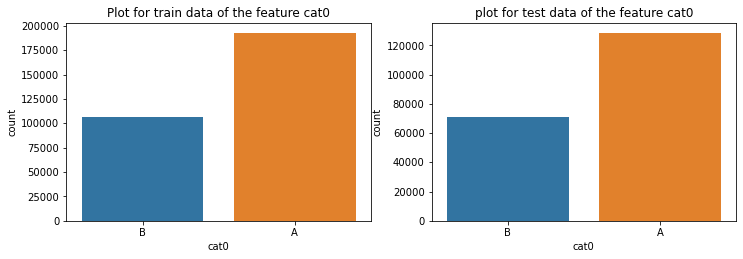

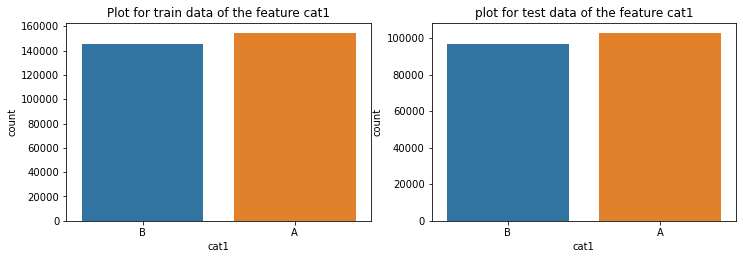

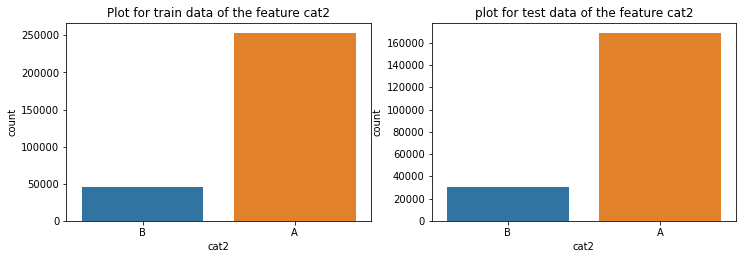

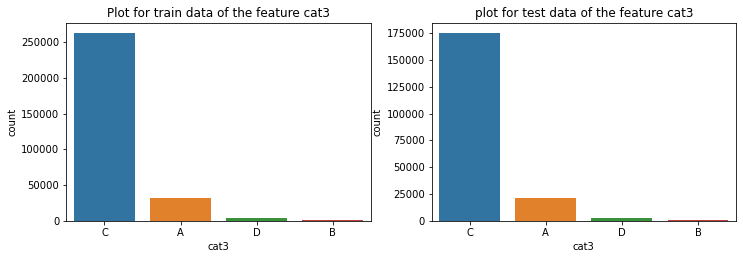

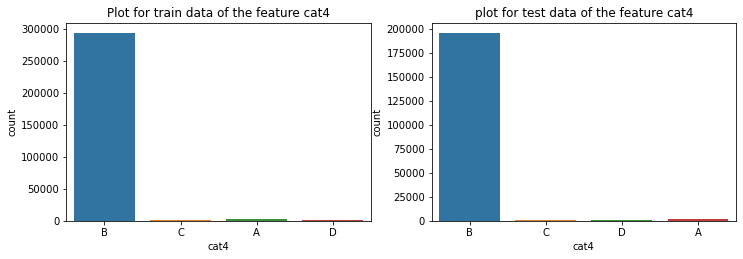

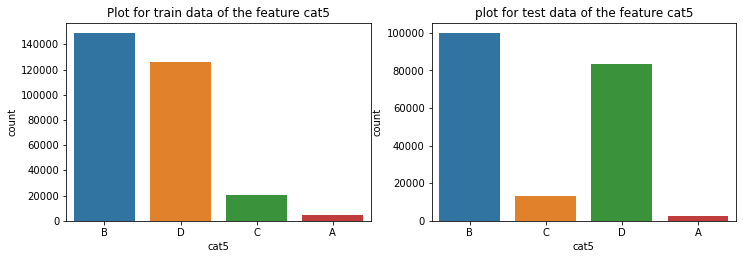

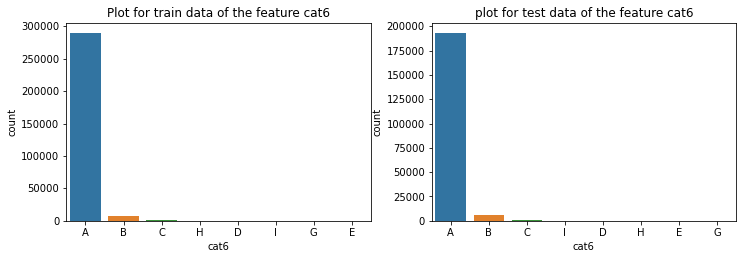

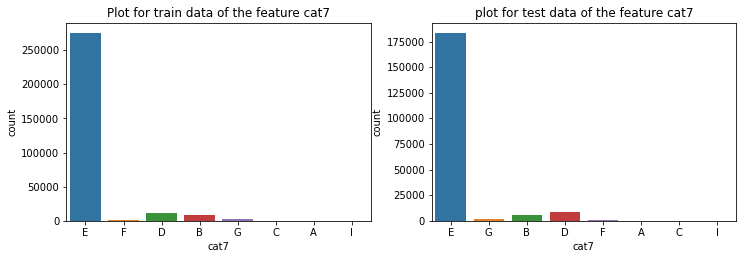

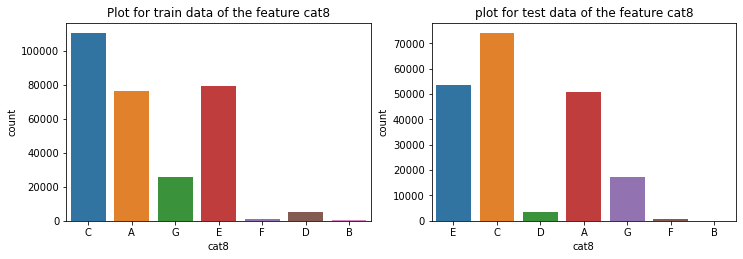

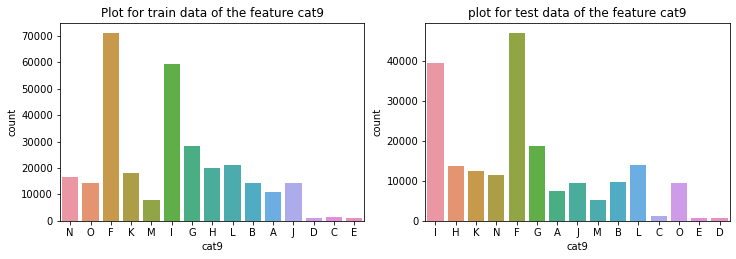

In [16]:
def plot_bar(var):
    plt.figure(figsize=(12,8))
    plt.subplot(2,2,1)
    plt.title(r"Plot for train data of the feature {}".format(var))
    sns.countplot(df1[var])
    plt.subplot(2,2,2)
    plt.title(r"plot for test data of the feature {}".format(var))
    sns.countplot(df2[var])
    plt.show()
    
category = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
for i in category:
    plot_bar(i)

In [17]:
def replace_outliers(df1, field_name):
    Q1 = np.percentile(df1[field_name],25,interpolation='midpoint')
    Q3 = np.percentile(df1[field_name],75,interpolation='midpoint')
    IQR = Q3-Q1
    maxi = Q3+1.5*IQR
    mini = Q1-1.5*IQR
    df1[field_name]=df1[field_name].mask(df1[field_name]>maxi,maxi)
    df1[field_name]=df1[field_name].mask(df1[field_name]<mini,mini)

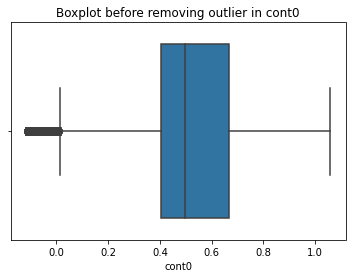

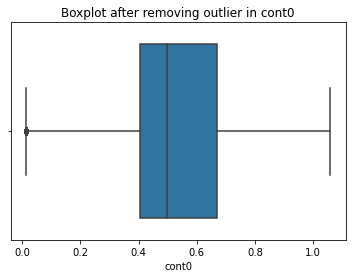

In [18]:
plt.title("Boxplot before removing outlier in cont0")
sns.boxplot(df1["cont0"])
plt.show()
replace_outliers(df1,'cont0')
plt.title("Boxplot after removing outlier in cont0")
sns.boxplot(df1['cont0'])
plt.show()

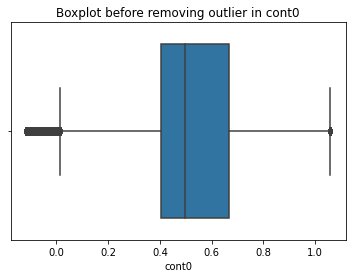

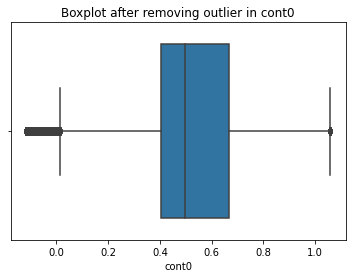

In [19]:
plt.title("Boxplot before removing outlier in cont0")
sns.boxplot(df2["cont0"])
plt.show()
replace_outliers(df1,'cont0')
plt.title("Boxplot after removing outlier in cont0")
sns.boxplot(df2['cont0'])
plt.show()

<AxesSubplot:xlabel='cont0', ylabel='Density'>

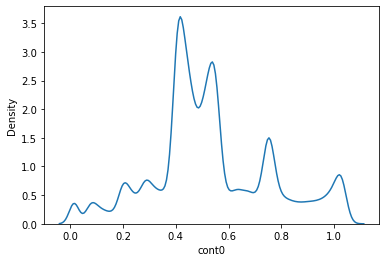

In [20]:
sns.distplot(df1['cont0'],hist=False)

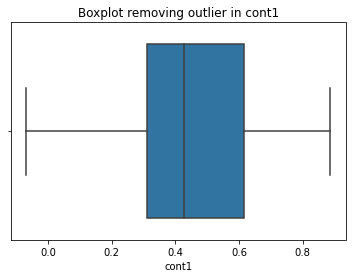

In [21]:
plt.title("Boxplot removing outlier in cont1")
sns.boxplot(df1["cont1"])
plt.show()

<AxesSubplot:xlabel='cont1', ylabel='Density'>

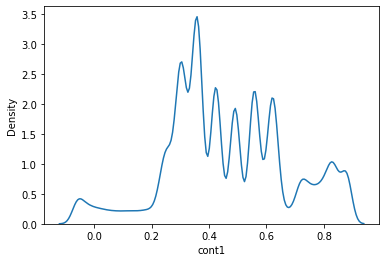

In [22]:
sns.distplot(df1['cont1'],hist=False)

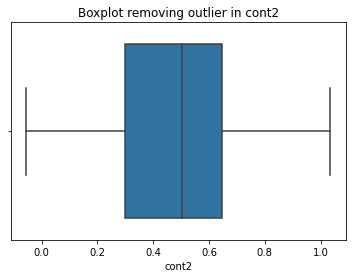

In [23]:
plt.title("Boxplot removing outlier in cont2")
sns.boxplot(df1["cont2"])
plt.show()

<AxesSubplot:xlabel='cont2', ylabel='Density'>

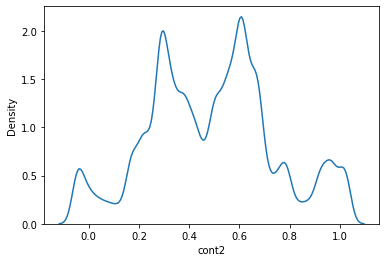

In [24]:
sns.distplot(df1['cont2'],hist=False)

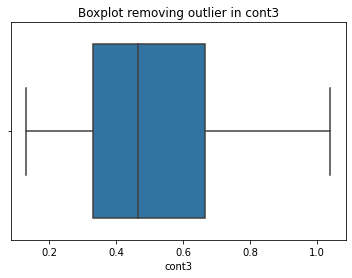

In [25]:
plt.title("Boxplot removing outlier in cont3")
sns.boxplot(df1["cont3"])
plt.show()

<AxesSubplot:xlabel='cont3', ylabel='Density'>

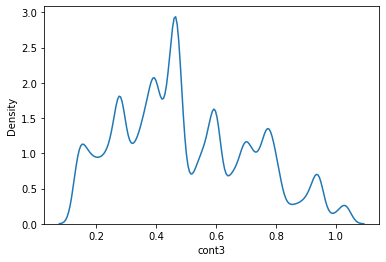

In [26]:
sns.distplot(df1['cont3'],hist=False)

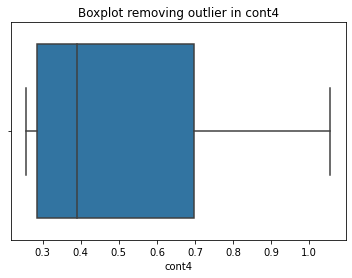

In [27]:
plt.title("Boxplot removing outlier in cont4")
sns.boxplot(df1["cont4"])
plt.show()

<AxesSubplot:xlabel='cont4', ylabel='Density'>

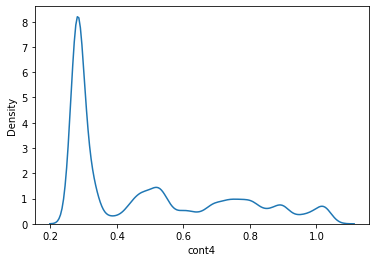

In [28]:
sns.distplot(df1['cont4'],hist=False)

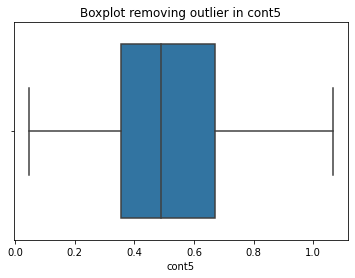

In [29]:
plt.title("Boxplot removing outlier in cont5")
sns.boxplot(df1["cont5"])
plt.show()

<AxesSubplot:xlabel='cont5', ylabel='Density'>

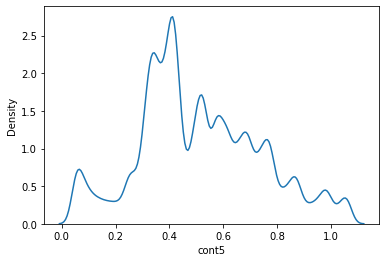

In [30]:
sns.distplot(df1['cont5'],hist=False)

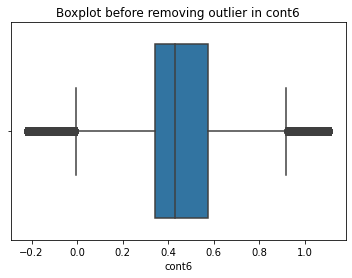

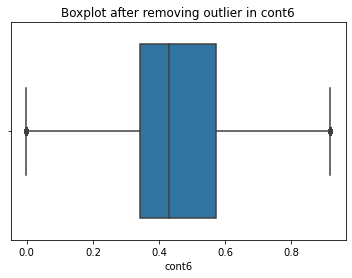

In [31]:
plt.title("Boxplot before removing outlier in cont6")
sns.boxplot(df1["cont6"])
plt.show()
replace_outliers(df1,'cont6')
plt.title("Boxplot after removing outlier in cont6")
sns.boxplot(df1['cont6'])
plt.show()

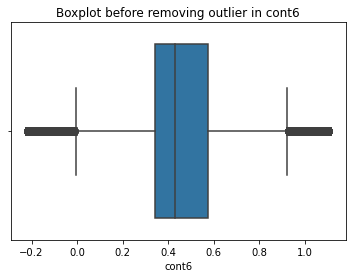

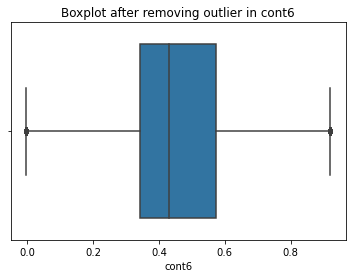

In [32]:
plt.title("Boxplot before removing outlier in cont6")
sns.boxplot(df2["cont6"])
plt.show()
replace_outliers(df2,'cont6')
plt.title("Boxplot after removing outlier in cont6")
sns.boxplot(df2['cont6'])
plt.show()

<AxesSubplot:xlabel='cont6', ylabel='Density'>

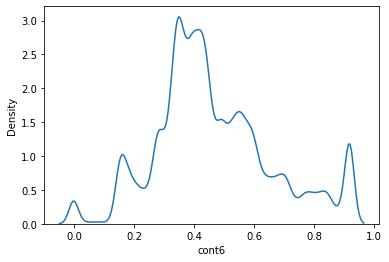

In [33]:
sns.distplot(df1['cont6'],hist=False)

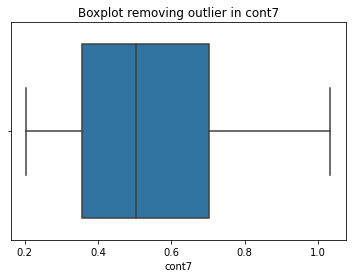

In [34]:
plt.title("Boxplot removing outlier in cont7")
sns.boxplot(df1["cont7"])
plt.show()

<AxesSubplot:xlabel='cont7', ylabel='Density'>

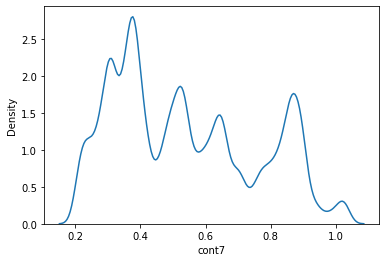

In [35]:
sns.distplot(df1['cont7'],hist=False)

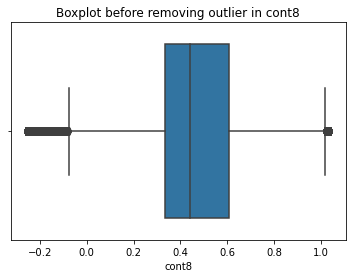

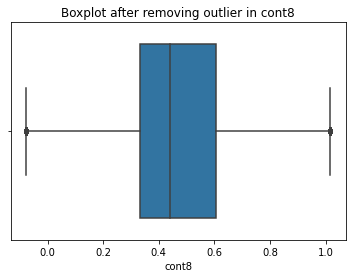

In [36]:
plt.title("Boxplot before removing outlier in cont8")
sns.boxplot(df1["cont8"])
plt.show()
replace_outliers(df1,'cont8')
plt.title("Boxplot after removing outlier in cont8")
sns.boxplot(df1['cont8'])
plt.show()

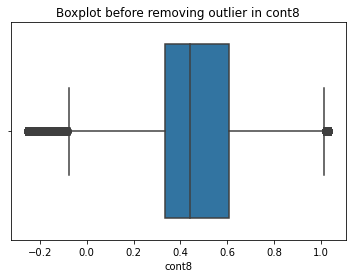

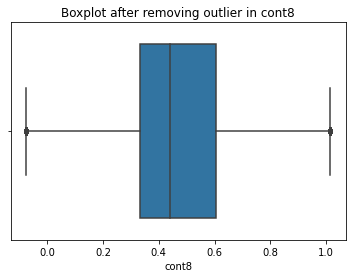

In [37]:
plt.title("Boxplot before removing outlier in cont8")
sns.boxplot(df2["cont8"])
plt.show()
replace_outliers(df2,'cont8')
plt.title("Boxplot after removing outlier in cont8")
sns.boxplot(df2['cont8'])
plt.show()

<AxesSubplot:xlabel='cont8', ylabel='Density'>

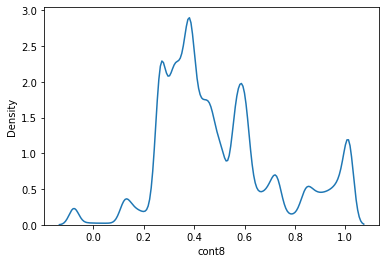

In [38]:
sns.distplot(df1['cont8'],hist=False)

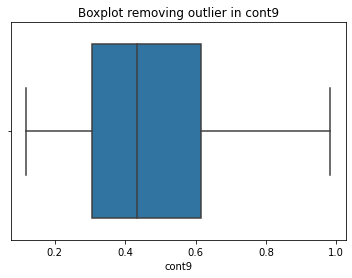

In [39]:
plt.title("Boxplot removing outlier in cont9")
sns.boxplot(df1["cont9"])
plt.show()

<AxesSubplot:xlabel='cont9', ylabel='Density'>

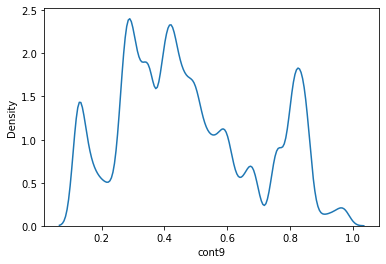

In [40]:
sns.distplot(df1['cont9'],hist=False)

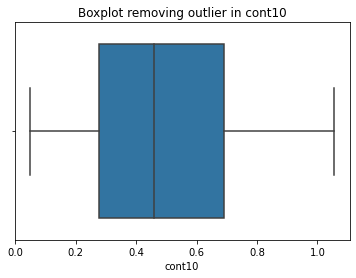

In [41]:
plt.title("Boxplot removing outlier in cont10")
sns.boxplot(df1["cont10"])
plt.show()

<AxesSubplot:xlabel='cont10', ylabel='Density'>

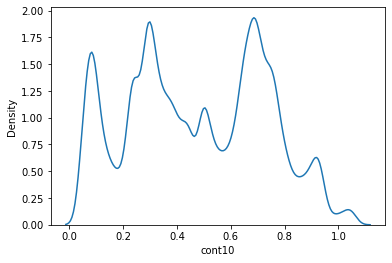

In [42]:
sns.distplot(df1['cont10'],hist=False)

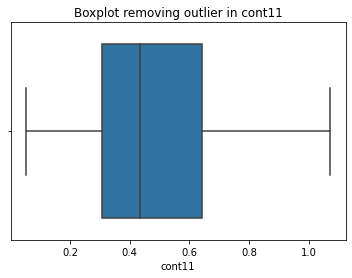

In [43]:
plt.title("Boxplot removing outlier in cont11")
sns.boxplot(df1["cont11"])
plt.show()

<AxesSubplot:xlabel='cont11', ylabel='Density'>

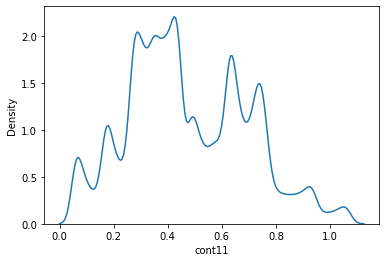

In [44]:
sns.distplot(df1['cont11'],hist=False)

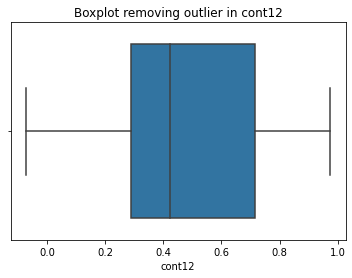

In [45]:
plt.title("Boxplot removing outlier in cont12")
sns.boxplot(df1["cont12"])
plt.show()

<AxesSubplot:xlabel='cont12', ylabel='Density'>

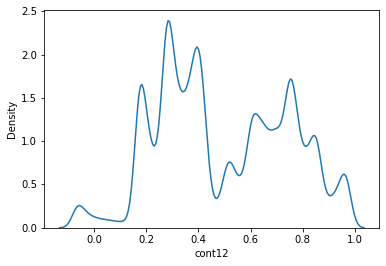

In [46]:
sns.distplot(df1['cont12'],hist=False)

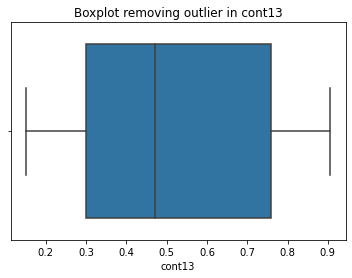

In [47]:
plt.title("Boxplot removing outlier in cont13")
sns.boxplot(df1["cont13"])
plt.show()

<AxesSubplot:xlabel='cont13', ylabel='Density'>

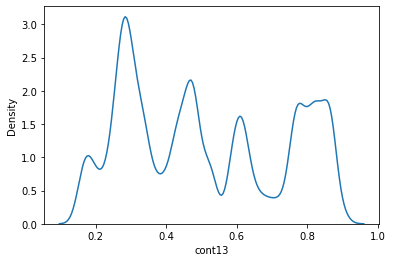

In [48]:
sns.distplot(df1['cont13'],hist=False)

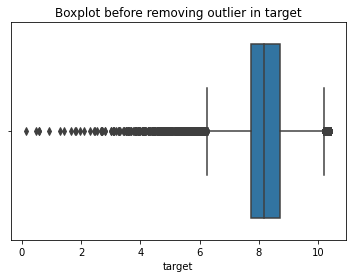

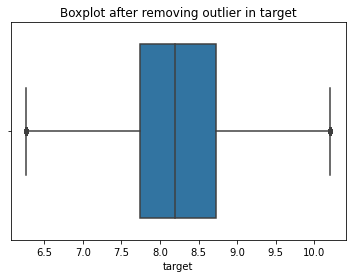

In [49]:
plt.title("Boxplot before removing outlier in target")
sns.boxplot(df1["target"])
plt.show()
replace_outliers(df1,'target')
plt.title("Boxplot after removing outlier in target")
sns.boxplot(df1['target'])
plt.show()

# Bivariate analysis

cat0
A    8.239894
B    8.247244
Name: target, dtype: float64


<AxesSubplot:xlabel='cat0', ylabel='target'>

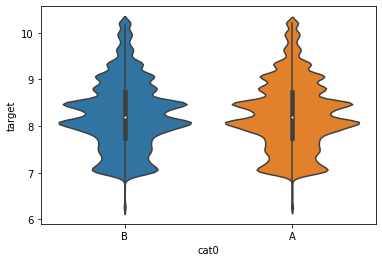

In [50]:
gp0 = df1.groupby('cat0')['target'].mean()
print(gp0)
sns.violinplot(df1['cat0'],df1['target'])

cat1
A    8.277408
B    8.205297
Name: target, dtype: float64


<AxesSubplot:xlabel='cat1', ylabel='target'>

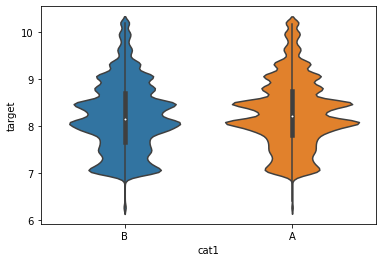

In [51]:
gp1 = df1.groupby('cat1')['target'].mean()
print(gp1)
sns.violinplot(df1['cat1'],df1['target'])

cat2
A    8.245493
B    8.226103
Name: target, dtype: float64


<AxesSubplot:xlabel='cat2', ylabel='target'>

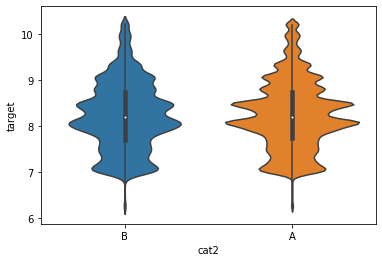

In [52]:
gp2 = df1.groupby('cat2')['target'].mean()
print(gp2)
sns.violinplot(df1['cat2'],df1['target'])

cat3
A    8.276784
B    8.369725
C    8.237602
D    8.272746
Name: target, dtype: float64


<AxesSubplot:xlabel='cat3', ylabel='target'>

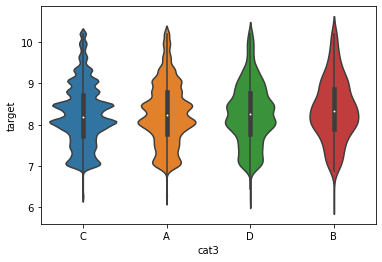

In [53]:
gp3 = df1.groupby('cat3')['target'].mean()
print(gp3)
sns.violinplot(df1['cat3'],df1['target'])

cat4
A    8.299975
B    8.241487
C    8.305928
D    8.278633
Name: target, dtype: float64


<AxesSubplot:xlabel='cat4', ylabel='target'>

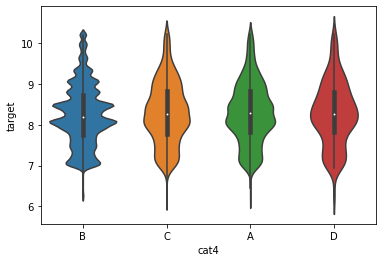

In [54]:
gp4 = df1.groupby('cat4')['target'].mean()
print(gp4)
sns.violinplot(df1['cat4'],df1['target'])

cat5
A    8.255276
B    8.231273
C    8.269699
D    8.251022
Name: target, dtype: float64


<AxesSubplot:xlabel='cat5', ylabel='target'>

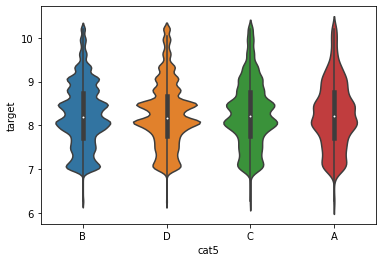

In [55]:
gp5 = df1.groupby('cat5')['target'].mean()
print(gp5)
sns.violinplot(df1['cat5'],df1['target'])

cat6
A    8.241518
B    8.269514
C    8.291089
D    8.306873
E    8.306267
G    8.149041
H    8.272211
I    8.281917
Name: target, dtype: float64


<AxesSubplot:xlabel='cat6', ylabel='target'>

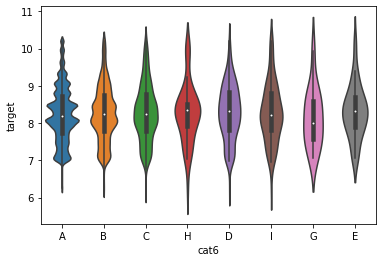

In [56]:
gp6 = df1.groupby('cat6')['target'].mean()
print(gp6)
sns.violinplot(df1['cat6'],df1['target'])

cat7
A    8.251984
B    8.257492
C    8.444314
D    8.254198
E    8.241196
F    8.306017
G    8.262534
I    8.063202
Name: target, dtype: float64


<AxesSubplot:xlabel='cat7', ylabel='target'>

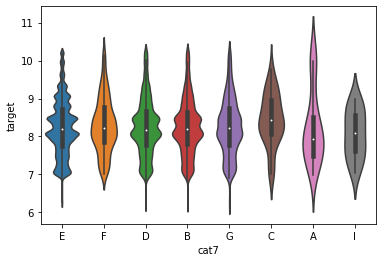

In [57]:
gp7 = df1.groupby('cat7')['target'].mean()
print(gp7)
sns.violinplot(df1['cat7'],df1['target'])

cat8
A    8.230847
B    8.176026
C    8.282345
D    8.243229
E    8.194758
F    8.210154
G    8.254788
Name: target, dtype: float64


<AxesSubplot:xlabel='cat8', ylabel='target'>

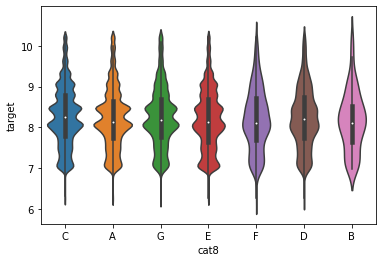

In [58]:
gp8 = df1.groupby('cat8')['target'].mean()
print(gp8)
sns.violinplot(df1['cat8'],df1['target'])

cat9
A    8.235961
B    8.240831
C    8.220397
D    8.220496
E    8.279499
F    8.259691
G    8.234335
H    8.241487
I    8.224336
J    8.231093
K    8.270622
L    8.236306
M    8.230208
N    8.250011
O    8.241040
Name: target, dtype: float64


<AxesSubplot:xlabel='cat9', ylabel='target'>

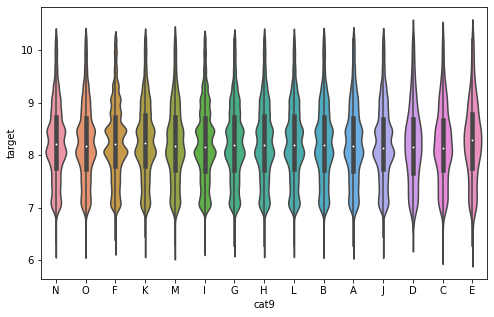

In [59]:
gp9 = df1.groupby('cat9')['target'].mean()
print(gp9)
plt.figure(figsize=(8,5))
sns.violinplot(df1['cat9'],df1['target'])

<Figure size 576x360 with 0 Axes>

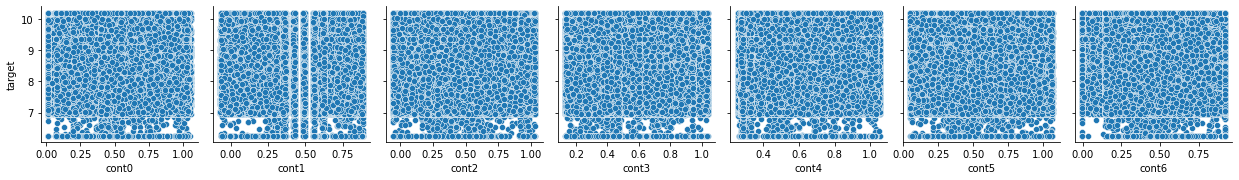

In [60]:
plt.figure(figsize=(8,5))
sns.pairplot(data=df1,x_vars=['cont0','cont1','cont2','cont3','cont4','cont5','cont6'],y_vars='target')

<Figure size 576x360 with 0 Axes>

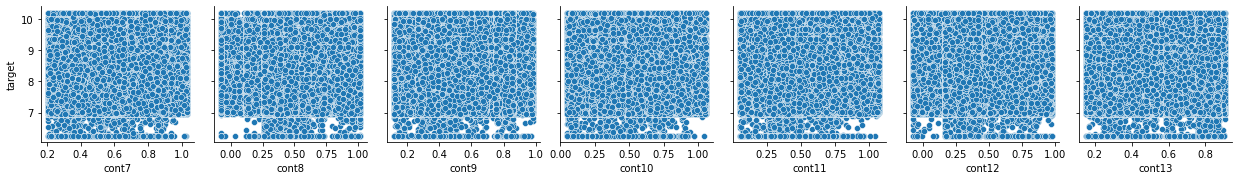

In [61]:
plt.figure(figsize=(8,5))
sns.pairplot(data=df1,x_vars=['cont7','cont8','cont9','cont10','cont11','cont12','cont13'],y_vars='target')

# Feature engineering

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [63]:
df1 = df1.drop(['cat3','cat4','cat6','cat7'],axis=1)
df2 = df2.drop(['cat3','cat4','cat6','cat7'],axis=1)

In [64]:
df1['cat0'] = le.fit_transform(df1['cat0'])
df1['cat1'] = le.fit_transform(df1['cat1'])
df1['cat2'] = le.fit_transform(df1['cat2'])
df2['cat0'] = le.fit_transform(df2['cat0'])
df2['cat1'] = le.fit_transform(df2['cat1'])
df2['cat2'] = le.fit_transform(df2['cat2'])

In [65]:
df1.columns

Index(['cat0', 'cat1', 'cat2', 'cat5', 'cat8', 'cat9', 'cont0', 'cont1',
       'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9',
       'cont10', 'cont11', 'cont12', 'cont13', 'target'],
      dtype='object')

In [66]:
df2.columns

Index(['cat0', 'cat1', 'cat2', 'cat5', 'cat8', 'cat9', 'cont0', 'cont1',
       'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9',
       'cont10', 'cont11', 'cont12', 'cont13'],
      dtype='object')

In [67]:
top_2_tr = [x for x in df1.cat5.value_counts().sort_values(ascending=False).head(2).index]
top_2_ts = [x for x in df2.cat5.value_counts().sort_values(ascending=False).head(2).index]

In [68]:
top_3_1_tr = [x for x in df1.cat8.value_counts().sort_values(ascending=False).head(3).index]
top_3_1_ts = [x for x in df2.cat8.value_counts().sort_values(ascending=False).head(3).index]

In [69]:
top_3_2_tr = [x for x in df1.cat9.value_counts().sort_values(ascending=False).head(3).index]
top_3_2_ts = [x for x in df2.cat9.value_counts().sort_values(ascending=False).head(3).index]

In [70]:
for i in top_2_tr:
    df1['cat5'+'_'+i]=np.where(df1['cat5']==i,1,0)

In [71]:
for i in top_2_ts:
    df2['cat5'+'_'+i]=np.where(df2['cat5']==i,1,0)

In [72]:
for i in top_3_1_tr:
    df1['cat8'+'_'+i]=np.where(df1['cat8']==i,1,0)

In [73]:
for i in top_3_1_ts:
    df2['cat8'+'_'+i]=np.where(df2['cat8']==i,1,0)

In [74]:
for i in top_3_2_tr:
    df1['cat9'+'_'+i]=np.where(df1['cat9']==i,1,0)

In [75]:
for i in top_3_2_ts:
    df2['cat9'+'_'+i]=np.where(df2['cat9']==i,1,0)

In [76]:
df1.head()

,cat0,cat1,cat2,cat5,cat8,cat9,cont0,cont1,cont2,cont3,...,cont13,target,cat5_B,cat5_D,cat8_C,cat8_E,cat8_A,cat9_F,cat9_I,cat9_G
id,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,B,C,N,0.201470,-0.014822,0.669699,0.136278,...,0.869850,8.113634,1,0,1,0,0,0,0,0
2,1,1,0,D,A,O,0.743068,0.367411,1.021605,0.365798,...,0.465083,8.481233,0,1,0,0,1,0,0,0
3,0,0,0,D,A,F,0.742708,0.310383,-0.012673,0.576957,...,0.763846,8.364351,0,1,0,0,1,1,0,0
4,1,1,0,D,C,K,0.429551,0.620998,0.577942,0.280610,...,0.280682,8.049253,0,1,1,0,0,0,0,0
6,0,0,0,D,A,N,1.058291,0.367492,-0.052389,0.232407,...,0.250823,7.972260,0,1,0,0,1,0,0,0


In [77]:
df2.head()

,cat0,cat1,cat2,cat5,cat8,cat9,cont0,cont1,cont2,cont3,...,cont12,cont13,cat5_B,cat5_D,cat8_C,cat8_E,cat8_A,cat9_F,cat9_I,cat9_G
id,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,B,E,I,0.296227,0.686757,0.587731,0.392753,...,0.301831,0.845702,1,0,0,1,0,0,1,0
5,0,1,0,C,C,H,0.543707,0.364761,0.452967,0.929645,...,0.850684,0.693940,0,0,1,0,0,0,0,0
15,1,0,0,B,D,K,0.408961,0.296129,0.690999,0.740027,...,0.376689,0.508099,1,0,0,0,0,0,0,0
16,1,1,0,D,A,N,1.031239,0.356062,0.303651,0.895591,...,0.393585,0.461372,0,1,0,0,1,0,0,0
17,1,1,0,C,C,F,0.530447,0.729004,0.281723,0.444698,...,0.370401,0.900412,0,0,1,0,0,1,0,0


In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [79]:
num_feature = ['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9',
               'cont10', 'cont11', 'cont12', 'cont13']
for i in num_feature:
    df1[i] = sc.fit_transform(df1[[i]])
    df2[i] = sc.fit_transform(df2[[i]])

In [80]:
df1 = df1.drop(['cont12','cat5','cat8','cat9'],axis=1)
df2 = df2.drop(['cont12','cat5','cat8','cat9'],axis=1)

<AxesSubplot:>

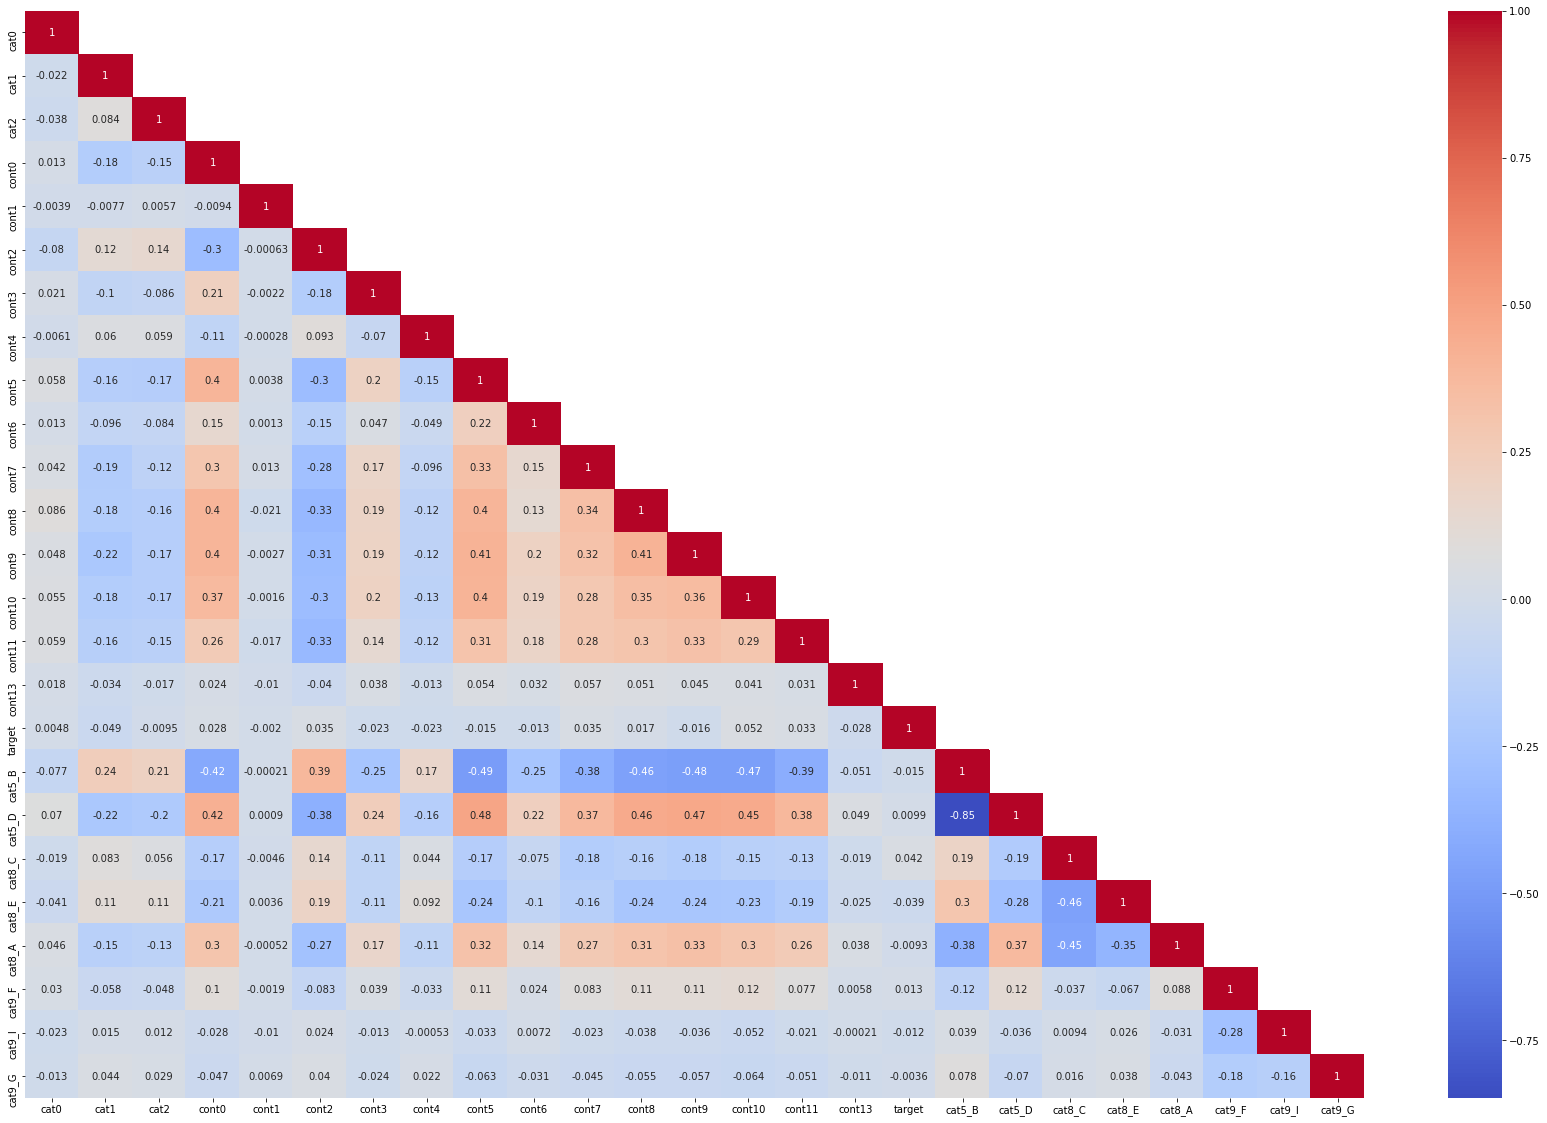

In [81]:
plt.figure(figsize=(30,20))
df_lt = df1.corr(method = "pearson")
df_lt1 = df_lt.where(np.tril(np.ones(df_lt.shape)).astype(np.bool))
sns.heatmap(df_lt1,annot=True,cmap="coolwarm")

In [82]:
df1.columns

Index(['cat0', 'cat1', 'cat2', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4',
       'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11',
       'cont13', 'target', 'cat5_B', 'cat5_D', 'cat8_C', 'cat8_E', 'cat8_A',
       'cat9_F', 'cat9_I', 'cat9_G'],
      dtype='object')

# Model building

In [83]:
X = df1.drop('target',axis=1)
y = df1['target']

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [85]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [86]:
from sklearn.feature_selection import RFE
rfe = RFE(lr,10)
rfe = rfe.fit(X_train,y_train)

In [87]:
temp_df1 = pd.DataFrame({'Columns':X_train.columns,'Included':rfe.support_,'Ranking':rfe.ranking_})
temp_df1

,Columns,Included,Ranking
0,cat0,False,13
1,cat1,True,1
2,cat2,False,12
3,cont0,True,1
4,cont1,False,14
5,cont2,True,1
6,cont3,True,1
7,cont4,False,8
8,cont5,True,1
9,cont6,False,9


In [88]:
lr_old = LinearRegression()
lr_old.fit(X_train,y_train)

LinearRegression()

In [89]:
x_pred1 = lr_old.predict(X_train)
y_pred1 = lr_old.predict(X_test)

In [90]:
temp_df_old = pd.DataFrame({'Actual':y_test,'Predicted':y_pred1})
temp_df_old

,Actual,Predicted
id,,
8330,9.374259,8.129645
86091,8.991401,8.270960
192120,8.514022,8.252688
498914,8.468016,8.114418
289384,7.129968,8.170302
...,...,...
124931,8.361180,8.233876
286557,8.509870,8.238388
230449,7.309735,8.234381


In [91]:
from sklearn import metrics
print("Mean absolute error on training set: ",metrics.mean_absolute_error(y_train,x_pred1))
print("Mean absolute error on testing set: ",metrics.mean_absolute_error(y_test,y_pred1))
print("Mean squared error on training set: ",metrics.mean_squared_error(y_train,x_pred1))
print("Mean squared error on testing set: ",metrics.mean_squared_error(y_test,y_pred1))
print("Root Mean squared error on training set: ",metrics.mean_squared_error(y_train,x_pred1,squared=False))
print("Root Mean squared error on testing set: ",metrics.mean_squared_error(y_test,y_pred1,squared=False))

Mean absolute error on training set:  0.5840513343860698
Mean absolute error on testing set:  0.5813796996530948
Mean squared error on training set:  0.5317973137772587
Mean squared error on testing set:  0.5274541315272551
Root Mean squared error on training set:  0.729244344357403
Root Mean squared error on testing set:  0.7262603744713428


In [92]:
imp_col = X_train.columns[rfe.support_]
imp_col

Index(['cat1', 'cont0', 'cont2', 'cont3', 'cont5', 'cont7', 'cont9', 'cont10',
       'cont11', 'cat8_C'],
      dtype='object')

In [93]:
X_train_new = X_train[imp_col]
X_train_new.head()

,cat1,cont0,cont2,cont3,cont5,cont7,cont9,cont10,cont11,cat8_C
id,,,,,,,,,,
423780,0,-0.565450,-0.437682,-1.572596,-0.063672,0.000418,0.208591,-0.437515,0.186420,0
88896,0,2.230094,-0.254739,1.328068,0.600591,1.518909,1.594378,0.107478,1.220722,0
413647,1,-0.324865,2.040713,0.428837,-0.402484,-0.932870,-0.334272,1.169205,-0.914528,0
348658,1,-0.582241,-0.502917,-0.121472,-0.140097,-0.984120,-0.727723,-0.968670,-0.594306,0
310136,1,0.053794,1.863164,-0.340610,-0.462335,-0.699644,-0.205509,0.230379,-1.866063,0


In [94]:
lr_new = LinearRegression()
lr_new.fit(X_train_new,y_train)

LinearRegression()

In [95]:
X_test_new = X_test[imp_col]
x_pred2 = lr_new.predict(X_train_new)
y_pred2 = lr_new.predict(X_test_new)

In [96]:
temp_df_new = pd.DataFrame({'Actual':y_test,'Predicted':y_pred2})
temp_df_new

,Actual,Predicted
id,,
8330,9.374259,8.063590
86091,8.991401,8.230629
192120,8.514022,8.235461
498914,8.468016,8.153220
289384,7.129968,8.198415
...,...,...
124931,8.361180,8.253211
286557,8.509870,8.212897
230449,7.309735,8.277043


In [97]:
print("Mean absolute error on training set: ",metrics.mean_absolute_error(y_train,x_pred2))
print("Mean absolute error on testing set: ",metrics.mean_absolute_error(y_test,y_pred2))
print("Mean squared error on training set: ",metrics.mean_squared_error(y_train,x_pred2))
print("Mean squared error on testing set: ",metrics.mean_squared_error(y_test,y_pred2))
print("Root Mean squared error on training set: ",metrics.mean_squared_error(y_train,x_pred2,squared=False))
print("Root Mean squared error on testing set: ",metrics.mean_squared_error(y_test,y_pred2,squared=False))

Mean absolute error on training set:  0.5847075910327778
Mean absolute error on testing set:  0.5819351091257323
Mean squared error on training set:  0.5330246337562032
Mean squared error on testing set:  0.5282776221216333
Root Mean squared error on training set:  0.7300853605957341
Root Mean squared error on testing set:  0.7268270923140064


# Boosting

In [98]:
from xgboost import XGBRegressor

In [99]:
xgb = XGBRegressor(random_state=1,n_jobs=4,n_estimators=5000,
                  learning_rate=0.01,subsample=0.9,
                  max_depth=5,colsample_bytree=0.5,reg_alpha=0.5,eval_metric='rmse')
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=5000, n_jobs=4,
             num_parallel_tree=1, random_state=1, reg_alpha=0.5, reg_lambda=1,
             scale_pos_weight=1, subsample=0.9, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [100]:
x_pred5 = xgb.predict(X_train)
y_pred5 = xgb.predict(X_test)

In [101]:
print("Mean absolute error on training set: ",metrics.mean_absolute_error(y_train,x_pred5))
print("Mean absolute error on testing set: ",metrics.mean_absolute_error(y_test,y_pred5))
print("Mean squared error on training set: ",metrics.mean_squared_error(y_train,x_pred5))
print("Mean squared error on testing set: ",metrics.mean_squared_error(y_test,y_pred5))
print("Root Mean squared error on training set: ",metrics.mean_squared_error(y_train,x_pred5,squared=False))
print("Root Mean squared error on testing set: ",metrics.mean_squared_error(y_test,y_pred5,squared=False))

Mean absolute error on training set:  0.5524960972475176
Mean absolute error on testing set:  0.5711127960914318
Mean squared error on training set:  0.4748486186117341
Mean squared error on testing set:  0.5072661522929878
Root Mean squared error on training set:  0.6890926052510897
Root Mean squared error on testing set:  0.7122261946130511


# Submission

In [102]:
X_test_org = df2.copy()
predictions = xgb.predict(X_test_org)
output = pd.DataFrame({'Id':df2.index,'target':predictions})
output.to_csv('submission.csv',index=False)

In [103]:
pd.DataFrame(predictions).shape

(200000, 1)